# `The Data API`
In TensorFlow, the Data API refers to a set of tools and utilities provided by TensorFlow for efficiently loading and preprocessing data. It offers a streamlined and flexible way to work with large datasets, making it easier to build and train machine learning models.

* The Data API in TensorFlow centers on the notion of a **dataset**, which is essentially a sequence of data items. While datasets typically read data from disk incrementally, for simplicity, one can create a dataset entirely in RAM.

## 1. Creating Dataset
* The `from_tensor_slices()` function in TensorFlow takes a tensor and generates a `tf.data.Dataset` where each element corresponds to a slice of the input tensor along its first dimension. For example, if the input tensor has a shape of (10, ...), the resulting dataset will contain 10 items, each representing a slice of the tensor along the first dimension, namely tensors 0 through 9.

In [49]:
import tensorflow as tf

# Generate a tensor containing values from 0 to 9 using tf.range()
X = tf.range(10)

# Create a tf.data.Dataset from the tensor X using from_tensor_slices()
# This function creates a dataset where each element is a slice of X along its first dimension
dataset = tf.data.Dataset.from_tensor_slices(X)

# Print the dataset to observe its structure
print(dataset)

# Alternatively, you can create a dataset containing a range of values from 0 to 9 using tf.data.Dataset.range()
dataset = tf.data.Dataset.range(10)

# Iterate through the dataset and print each item
for item in dataset:
    print(item)


<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


## 2. Chaining Transformations

In the context of TensorFlow's Data API, transformations refer to the operations applied to datasets to **modify** or **preprocess** the data in various ways. These transformations are used to prepare the data for training machine learning models.

**Common transformations include:**

* **Batching**: Grouping multiple examples into batches, which enables processing multiple examples in parallel, typically to improve efficiency during training.

* **Repeating**: The `repeat()` transformation is used to repeat the elements of a dataset for a specified number of epochs or indefinitely if no argument is provided. This transformation is often used to ensure that the dataset provides enough data for training over multiple epochs.

In [50]:
# Repeat the dataset third time to create a new dataset that contains two repetitions of the original data
# Then, batch the dataset into batches of size 7, meaning each batch will contain 7 elements
dataset = dataset.repeat(3).batch(7)

# Iterate through the transformed dataset
for item in dataset:
    # Print each batch of the dataset
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


In [51]:
import tensorflow as tf

# Create a dataset containing elements from 0 to 9
dataset = tf.data.Dataset.range(10)

# Repeat the dataset twice
dataset = dataset.repeat(3)

# Batch the dataset into batches of size 7, dropping any remainder
dataset = dataset.batch(7, drop_remainder=True)

# Iterate through the dataset
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)


* **Mapping**: Applying a function to each element of the dataset. This function can be used for various purposes, such as data preprocessing, feature engineering, or data augmentation.

In [52]:
import tensorflow as tf

# Define a simple transformation function
def square(x):
    return x ** 2

# Create a dataset containing elements from 0 to 9
dataset = tf.data.Dataset.range(10)

# Apply the square function to each element of the dataset in parallel
# Specify num_parallel_calls to control the degree of parallelism
# Here, tf.data.experimental.AUTOTUNE dynamically determines the degree of parallelism
dataset = dataset.map(square, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Iterate through the transformed dataset
for item in dataset:
    print(item.numpy())  # Print each transformed element

0
1
4
9
16
25
36
49
64
81


* **Applying**: The `apply()` method is used to apply a transformation that operates on the dataset as **a whole** rather than individual elements.

   * It allows for more complex transformations that involve **aggregating**, **filtering**, or **modifying** the dataset **as a whole**.

   * The `apply()` method can be used to perform operations such as **batch-wise normalization**, or custom dataset preprocessing.

   * Unlike the `map()` method, the transformation function passed to `apply()` operates on the entire dataset or subsets of it rather than individual elements. 

   * The transformation function passed to the apply() method must return a new dataset.

In [53]:
import tensorflow as tf

# Create a dataset containing elements from 0 to 4
dataset = tf.data.Dataset.range(5)

# Define a transformation function to create a copy of the dataset
def copy_dataset(ds):
    return ds

# Apply the copy_dataset function to the dataset using the apply() method
copied_dataset = dataset.apply(copy_dataset)

# Iterate through the copied dataset
for item in copied_dataset:
    print(item.numpy())


0
1
2
3
4


* **Filtering**: Removing examples from the dataset based on certain criteria, such as removing outliers or selecting specific classes for classification tasks.

In [54]:
import tensorflow as tf

# Create a dataset containing elements from 0 to 9
dataset = tf.data.Dataset.range(10)

# Apply a filter using a lambda function to keep only elements greater than 5
filtered_dataset = dataset.filter(lambda x: x > 5)

# Iterate through the filtered dataset
for item in filtered_dataset:
    print(item.numpy())

6
7
8
9


* **Takeing**: Sometimes you just need to check out a few things from a dataset. That's where the `take()` method comes in handy.

In [55]:
import tensorflow as tf

# Create a dataset containing elements from 0 to 9
dataset = tf.data.Dataset.range(10)

# Using tf.take to select the first five items
subset = dataset.take(5)

# Iterating over the subset
for item in subset:
    print(item.numpy())

0
1
2
3
4


**Shuffling**: Randomly shuffling the data to introduce randomness and prevent the model from learning the order of the examples.
   * **Here's how it works:** the method creates a new dataset that initially fills a buffer with items from the source dataset. Then, whenever you request an item, it randomly picks one from the buffer and replaces it with a fresh item from the source dataset until it's gone through the entire source dataset. After that, it keeps randomly selecting items from the buffer until it's empty. 

   * It's crucial to set the buffer size large enough for effective shuffling, but not so large that it exceeds your available RAM. Even if you have plenty of memory, it's unnecessary to surpass the dataset's size. 
   
   * If you want the shuffle to produce the same random order each time you run your program, you can specify a random seed. 

In [56]:
# Create a dataset with numbers from 0 to 9, repeated three times
dataset = tf.data.Dataset.range(10).repeat(3) 

# Shuffle the dataset with a buffer size of 5 and a random seed of 42,
# then batch the shuffled dataset into groups of 7
dataset = dataset.shuffle(buffer_size=5, seed=42).batch(7)

# Iterate over the dataset and print each batch
for item in dataset:
    print(item)


tf.Tensor([0 1 6 5 7 3 9], shape=(7,), dtype=int64)
tf.Tensor([8 2 1 0 4 6 4], shape=(7,), dtype=int64)
tf.Tensor([7 2 5 9 2 1 3], shape=(7,), dtype=int64)
tf.Tensor([4 3 8 7 9 5 0], shape=(7,), dtype=int64)
tf.Tensor([8 6], shape=(2,), dtype=int64)


**Mixing lines from various files together**

* If you have a **big dataset** that **can't fit in memory**, just shuffling won't cut it because the buffer size is too small compared to the dataset.

* To add further shuffling to the instances, a typical method involves **dividing the original data** into several files, then reading them in a random sequence during training. Nonetheless, instances within the same file may still be grouped together. To prevent this, one can randomly select multiple files and read them concurrently, mixing their entries. Additionally, a shuffling buffer can be applied using the `shuffle()` method.

**Split the California dataset to multiple CSV files**

1. Let's start by loading and preparing the California housing dataset. 
   * We first load it, then split it into a training set, a validation set and a test set, and finally we scale it.

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

2. **Splitting CSV file**: For a very large dataset that does not fit in memory, you will typically want to split it into many files first, then have TensorFlow read these files in parallel. 
   * To demonstrate this, let's start by splitting the housing dataset and save it to 20 CSV files

In [58]:
import os  # Importing the os module for file path manipulation
import numpy as np  # Importing numpy for array operations

# Define a function to save data to multiple CSV files
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    # Define the directory where CSV files will be stored
    housing_dir = os.path.join("datasets", "housing")
    # Create the directory if it doesn't exist
    os.makedirs(housing_dir, exist_ok=True)
    # Define the format for the file path, where {} will be replaced by name_prefix and {:02d} will be replaced by file_idx
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")
    # Initialize an empty list to store file paths
    filepaths = []
    # Get the total number of rows in the data
    m = len(data)

    # Split the indices of rows into approximately equal parts (number of parts specified by n_parts)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        # Generate the file path for the current part
        part_csv = path_format.format(name_prefix, file_idx)
        # Append the file path to the list of file paths
        filepaths.append(part_csv)
        # Open the file for writing
        with open(part_csv, "wt", encoding="utf-8") as f:
            # Write the header if provided
            if header is not None:
                f.write(header)
                f.write("\n")
            # Write each row of data to the file
            for row_idx in row_indices:
                # Write each column of the row, separated by commas
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    # Return the list of file paths
    return filepaths


In [59]:
# Concatenate the features (X) and target variable (y) for training, validation and test data
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]

# Define the header for the CSV files by concatenating feature names and target variable name
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

# Save training, validation and test data to multiple CSV files with 20 parts
train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

# Now, let's read and display the first few lines of one of the CSV files using Pandas
import pandas as pd

# Read the first few lines of the first CSV file of the training dataset
pd.read_csv(train_filepaths[0]).head()

# # Or, alternatively, we can read the first few lines in text mode
# # Open the first CSV file of the training dataset
# with open(train_filepaths[0]) as f:
#     # Read and print the first 5 lines
#     for i in range(5):
#         print(f.readline(), end="")

# # Finally, we have the file paths of the saved CSV files for training data
# train_filepaths


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


3. **Creating an Input Pipeline**: 

   * Start by generating a **dataset** comprising **file paths**.

   * Optionally, control the shuffling behavior of the file paths dataset using the shuffle parameter in the `list_files()` function.

   * Utilize the `interleave()` method to concurrently read lines from multiple files, with the capability to specify the number of files to read at once.

     * It starts by reading from five different files simultaneously, because we specified `cycle_length=n_readers = 5`.

     * Each of these files is represented as a `TextLineDataset`, which reads one line at a time from its respective file.

     * As we iterate through the interleave dataset, it reads one line from each of these five TextLineDatasets.

     * Once all the datasets are out of items (meaning all files have been read completely), it moves on to the next batch of five file paths from filepath_dataset.

     * It then repeats the process, interweaving lines from the new set of five files until they are all exhausted.

     * This cycle continues until there are no more file paths left in filepath_dataset.

In [60]:
import tensorflow as tf

# List all file paths in the directory specified by train_filepaths
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

# # Print each filepath in the dataset
# for filepath in filepath_dataset:
#     print(filepath)

# Define the number of readers
n_readers = 5

# Interleave reading lines from multiple files
dataset = filepath_dataset.interleave(
    # For each filepath, create a TextLineDataset and skip the header line
    # TextLineDataset is a tool that makes it easy to read text files line by line.
    # It turns each line of a text file into an item in a dataset.
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    # Specify the number of files to read in parallel
    cycle_length=n_readers)

# Print the first 5 lines from the interleaved dataset
for line in dataset.take(5):
    print(line.numpy())

b'4.7361,7.0,7.464968152866242,1.1178343949044587,846.0,2.694267515923567,34.49,-117.27,1.745'
b'3.6641,17.0,5.577142857142857,1.1542857142857144,511.0,2.92,40.85,-121.07,0.808'
b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'
b'2.3,25.0,5.828178694158075,0.9587628865979382,909.0,3.1237113402061856,36.25,-119.4,1.328'


**Note:** By default, the `interleave()` method operates sequentially, reading one line at a time from each file. If you wish to enhance efficiency by reading files in parallel, you can specify the `num_parallel_calls` argument. This parameter allows you to define the number of threads used for reading, which can significantly speed up the process, especially when dealing with large datasets or files.

In [61]:
import tensorflow as tf

# Create a dataset containing file paths from the specified directory
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

# Define the number of readers
n_readers = 5

# Interleave reading lines from multiple files
dataset = filepath_dataset.interleave(
    # For each filepath, create a TextLineDataset and skip the header line
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    # Control the number of files read in parallel for efficiency
    num_parallel_calls=tf.data.experimental.AUTOTUNE,
    cycle_length=n_readers
)

# Print the first 5 lines from the interleaved dataset
for line in dataset.take(5):
    print(line.numpy())

b'4.7361,7.0,7.464968152866242,1.1178343949044587,846.0,2.694267515923567,34.49,-117.27,1.745'
b'3.6641,17.0,5.577142857142857,1.1542857142857144,511.0,2.92,40.85,-121.07,0.808'
b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'
b'2.3,25.0,5.828178694158075,0.9587628865979382,909.0,3.1237113402061856,36.25,-119.4,1.328'


Preprocessing the Data

In [62]:
n_inputs = 8  # Number of input features, derived from the shape of X_train

# Define a TensorFlow function for preprocessing a single line of CSV data
@tf.function
def preprocess(line):
    # Define the default values for each field in the CSV record
    # 'defs' is a list containing default values for each field in the CSV record.
    # For numerical fields, it initializes with '0.0', repeated 'n_inputs' times.
    # and it initializes an empty tensor using TensorFlow.
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    
    # Decode the CSV line into fields, using default values specified by 'defs' for missing or unparsable fields
    # This function call takes the 'line' of CSV data and attempts to parse it into individual fields.
    # If any field is missing or cannot be parsed, TensorFlow uses the default values provided in 'defs' to fill in those fields.
    # The resulting 'fields' variable contains TensorFlow tensors representing each field in the CSV record.
    fields = tf.io.decode_csv(line, record_defaults=defs)

    # Stack the parsed fields to create input features (x) and labels (y)
    x = tf.stack(fields[:-1])  # Stack all fields except the last one as input features
    y = tf.stack(fields[-1:])   # Stack the last field as the label
    
    # Normalize input features using mean (X_mean) and standard deviation (X_std)
    normalized_x = (x - X_mean) / X_std
    
    return normalized_x, y

# Example usage of the preprocess function with a sample CSV line
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,12.2')


(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579157,  1.216324  , -0.05204565, -0.39215982, -0.5277444 ,
        -0.26334876,  0.8543047 , -1.3072057 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([12.2], dtype=float32)>)

### Putting Everything Together

* In This case the dataset undergoes **preprocessing**, **shuffling**, **optional repetition**, and **batching** to optimize its readiness for machine learning tasks

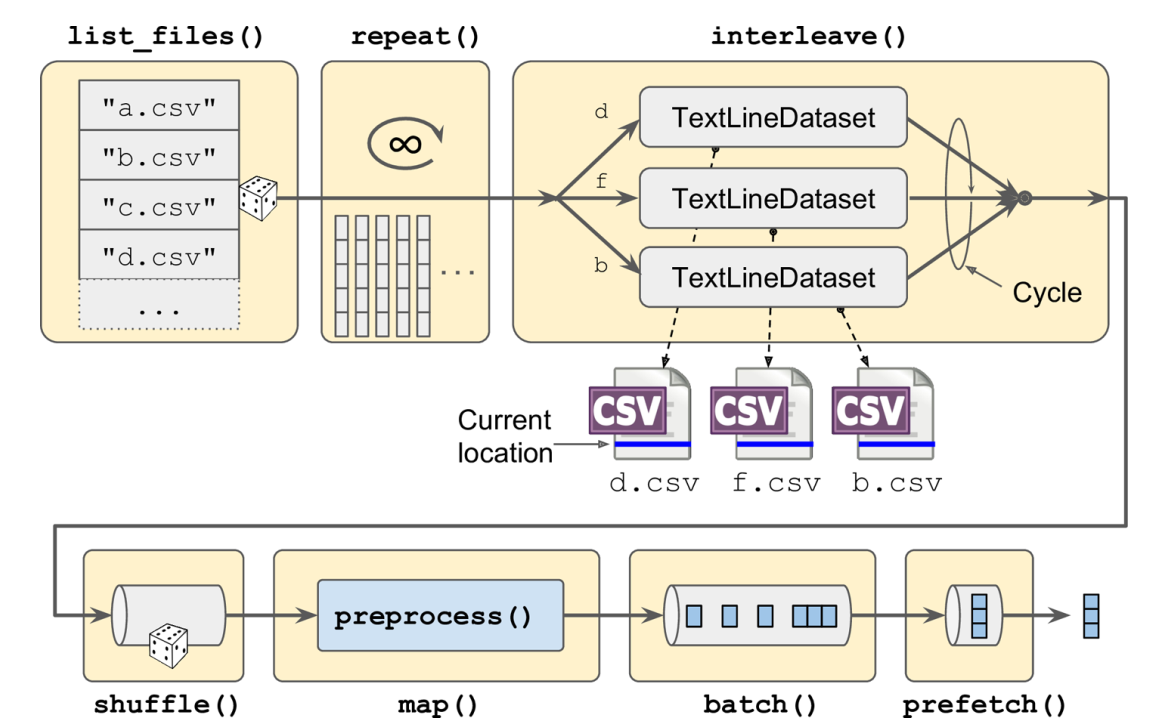

In [63]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    # Create a dataset by listing files from provided filepaths and repeating if specified
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    # Interleave the dataset to read from multiple files concurrently
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    # Shuffle the dataset to introduce randomness
    dataset = dataset.shuffle(shuffle_buffer_size)
    # Map the preprocessing function to each element of the dataset
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    # Batch the dataset for efficient processing
    dataset = dataset.batch(batch_size)
    # Prefetch a batch ahead to improve performance
    return dataset.prefetch(1)

#### Prefetching

* Adding prefetch(1) to the dataset setup ensures that the dataset is always ahead by one batch. 

* While the training algorithm works on one batch, the dataset is simultaneously preparing the next batch, like fetching data from disk and preprocessing it. This approach significantly boosts performance.

### Multithreading
* **Multithreading for Loading and Preprocessing:** When we say "multithreading," we're referring to a programming technique where different parts of a program (or in this case, different tasks like loading data from disk and preprocessing it) are executed simultaneously. This is particularly useful when you have multiple CPU cores available, as each core can handle a separate task concurrently.

* **Leveraging Multiple CPU Cores:** By making loading and preprocessing multithreaded and utilizing multiple CPU cores (num_parallel_calls), you're maximizing the CPU's computational power. This can potentially make the batch preparation process faster than the actual training process on the GPU.

* **Faster Batch Preparation than GPU Training:** If the CPU can prepare batches of data faster than the GPU can process them, it means the GPU might be waiting for the next batch to be ready. By ensuring that batch preparation is highly optimized and potentially faster than GPU training, you can keep the GPU almost fully utilized, minimizing idle time.

* **Maximizing GPU Utilization:** The goal is to keep the GPU as busy as possible, with minimal downtime waiting for data. If batch preparation is efficiently handled by the CPU and is faster than GPU training, the GPU can operate at nearly full capacity, except for the time it takes to transfer data from the CPU to the GPU.

* **Resulting in Faster Training:** When both CPU and GPU are effectively utilized and synchronized, the overall training process becomes much faster. The GPU spends less time waiting for data and more time performing computations, leading to faster training times overall.

**In summary,** by optimizing both CPU and GPU utilization, you can achieve faster training times for your machine learning models.

### Training a Keras model using Datasets

* Utilize the `csv_reader_dataset()` function to create a dataset for the training set. 
* We also create datasets for the validation set and the test set:
* And now we can simply build and train a Keras model using these datasets. 
* All we need to do is pass the training and validation **datasets** to the `fit()` method, instead of `X_train`, `y_train`, `X_valid`, and `y_valid`.

In [65]:
from tensorflow import keras

# Set random seed for TensorFlow for reproducibility
tf.random.set_seed(42)

# Creating a dataset for training with a batch size of 3
train_set = csv_reader_dataset(train_filepaths, batch_size=3)

# # Iterating over the first 2 batches of the training set and printing X and y
# for X_batch, y_batch in train_set.take(2):
#     print("X =", X_batch)
#     print("y =", y_batch)
#     print()

# Creating a training dataset without repeating the data
train_set = csv_reader_dataset(train_filepaths, repeat=None)
# Creating validation and test datasets
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

# Clearing any existing Keras session and setting seeds for reproducibility
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Defining a sequential model with a dense layer of 30 neurons with ReLU activation
# and an output layer with 1 neuron
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

# Compiling the model with mean squared error loss and stochastic gradient descent optimizer
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Setting the batch size for training
batch_size = 32
# Training the model with the training set, specifying steps per epoch, epochs, and validation data
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, epochs=10,
          validation_data=valid_set)

model.evaluate(test_set)  # Evaluate the model's performance on the test set

new_set = test_set.take(3).map(lambda X, y: X)  # Extract input features from the first 3 instances in the test set
# This line pretends that we have 3 new instances by taking the first 3 instances from the test set and keeping only their input features

model.predict(new_set)  # Use the model to predict outcomes for the new instances
# Predict outcomes for the new instances using the model

Epoch 1/10
362/362 [==============================] - 3s 3ms/step - loss: 2.0429 - val_loss: 4.2138
Epoch 2/10
362/362 [==============================] - 2s 5ms/step - loss: 0.7459 - val_loss: 1.2428
Epoch 3/10
362/362 [==============================] - 1s 1ms/step - loss: 0.6369 - val_loss: 0.7437
Epoch 4/10
362/362 [==============================] - 1s 1ms/step - loss: 0.5928 - val_loss: 0.5479
Epoch 5/10
362/362 [==============================] - 1s 1ms/step - loss: 0.5472 - val_loss: 0.5196
Epoch 6/10
362/362 [==============================] - 2s 5ms/step - loss: 0.5566 - val_loss: 0.4943
Epoch 7/10
362/362 [==============================] - 1s 1ms/step - loss: 0.5053 - val_loss: 0.4922
Epoch 8/10
362/362 [==============================] - 0s 1ms/step - loss: 0.4910 - val_loss: 0.4555
Epoch 9/10
362/362 [==============================] - 1s 1ms/step - loss: 0.4823 - val_loss: 0.4424
Epoch 10/10
3/3 [==============================] - 0s 6ms/step


array([[1.9068463 ],
       [2.450242  ],
       [1.1300108 ],
       [0.9939425 ],
       [2.6175199 ],
       [1.8263694 ],
       [2.8774614 ],
       [2.713368  ],
       [1.8072293 ],
       [3.0809612 ],
       [1.158948  ],
       [2.446024  ],
       [5.0081863 ],
       [2.6077437 ],
       [1.4475114 ],
       [2.203578  ],
       [3.8736901 ],
       [1.7566833 ],
       [1.6747415 ],
       [2.7432697 ],
       [2.2988906 ],
       [1.1765952 ],
       [2.4222898 ],
       [1.5933169 ],
       [1.6444383 ],
       [1.8046511 ],
       [2.3893995 ],
       [0.9594565 ],
       [3.0661554 ],
       [4.8907423 ],
       [1.8406935 ],
       [2.0202303 ],
       [0.82785183],
       [1.0557073 ],
       [1.9623746 ],
       [1.5694302 ],
       [1.8055862 ],
       [2.3111386 ],
       [1.8488736 ],
       [2.058156  ],
       [2.6256986 ],
       [3.116146  ],
       [1.451036  ],
       [1.8724395 ],
       [1.093162  ],
       [1.9446356 ],
       [0.9891424 ],
       [2.745

#### Building custom training loop using Datasets
* If you want to build your own custom training loop, you can just iterate over the training set, very naturally:

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01)  # Define the Nadam optimizer with a learning rate of 0.01
loss_fn = keras.losses.mean_squared_error  # Define the loss function as mean squared error

n_epochs = 5  # Number of epochs for training
batch_size = 32  # Batch size for training
n_steps_per_epoch = len(X_train) // batch_size  # Number of steps per epoch
total_steps = n_epochs * n_steps_per_epoch  # Total number of training steps
global_step = 0  # Initialize global step counter

# Loop through the training set for the specified number of total steps
for X_batch, y_batch in train_set.take(total_steps):
    global_step += 1  # Increment the global step counter
    print("\rGlobal step {}/{}".format(global_step, total_steps), end="")  # Print progress

    with tf.GradientTape() as tape:  # Record operations for automatic differentiation
        y_pred = model(X_batch)  # Forward pass: compute predicted values
        main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))  # Compute main loss
        loss = tf.add_n([main_loss] + model.losses)  # Add main loss and any regularization losses

    gradients = tape.gradient(loss, model.trainable_variables)  # Compute gradients
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # Update model weights using gradients


#### Building TF Function that performs the training loop

* If you want to build your own custom training loop, you can just iterate over the training set, very naturally:

In [ ]:
keras.backend.clear_session()  # Clear any existing Keras session
np.random.seed(42)  # Set the random seed for NumPy
tf.random.set_seed(42)  # Set the random seed for TensorFlow

optimizer = keras.optimizers.Nadam(learning_rate=0.01)  # Define the Nadam optimizer with a learning rate of 0.01
loss_fn = keras.losses.mean_squared_error  # Define the loss function as mean squared error

@tf.function  # Decorator to convert the function into a TensorFlow graph
def train(model, n_epochs, batch_size=32,
          n_readers=5, n_read_threads=5, shuffle_buffer_size=10000, n_parse_threads=5):
    train_set = csv_reader_dataset(train_filepaths, repeat=n_epochs, n_readers=n_readers,
                       n_read_threads=n_read_threads, shuffle_buffer_size=shuffle_buffer_size,
                       n_parse_threads=n_parse_threads, batch_size=batch_size)
    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:  # Record operations for automatic differentiation
            y_pred = model(X_batch)  # Forward pass: compute predicted values
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))  # Compute main loss
            loss = tf.add_n([main_loss] + model.losses)  # Add main loss and any regularization losses
        gradients = tape.gradient(loss, model.trainable_variables)  # Compute gradients
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))  # Update model weights using gradients

train(model, 5)  # Train the model for 5 epochs using the defined training function


**Note:** Here is a short description of each method in the `Dataset` class:

In [66]:
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● bucket_by_sequence_length()A transformation that buckets elements in a `Dataset` by length.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● choose_from_datasets()Creates a dataset that deterministically chooses elements from `datasets`.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Create

# `The TFRecord binary format`

* `TFRecord` is indeed a preferred format in TensorFlow for efficiently storing and reading large amounts of data. 
* It's a binary format composed of a sequence of binary records, each with a length, CRC checksum for length verification, the data itself, and a CRC checksum for data integrity.

### **Creating** a TFRecord file
* It can be easily done using `tf.io.TFRecordWriter`.

In [2]:
import tensorflow as tf

# Writing data to TFRecord file
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

### **Reading** TFRecord files, 
* You can use `tf.data.TFRecordDataset`.

In [2]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)

# Iterating over dataset and printing each item
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


#### **Reading multiple** TFRecord files with just one `TFRecordDataset`. 
* By default it will read them one at a time, but if you set `num_parallel_reads=3`, it will read 3 at a time in parallel and interleave their records:

In [3]:
# Generate file paths for TFRecord files
filepaths = ["my_test_{}.tfrecord".format(i) for i in range(5)]

# Write data to TFRecord files
for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            # Encode and write data to TFRecord file
            f.write("File {} record {}".format(i, j).encode("utf-8"))

# Create a dataset from TFRecord files
dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)

# Iterate through dataset and print items
for item in dataset:
    print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


### **Compressing** TFRecord files 
* It can indeed be beneficial, especially when dealing with large datasets or when transmitting them over a network. 
* By compressing TFRecord files, you can reduce storage space and improve network transfer efficiency.

In [ ]:
import tensorflow as tf

# Define options for compression
options = tf.io.TFRecordOptions(compression_type="GZIP")

# Create a TFRecord writer with compression options
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
    # Write your data into the TFRecord file
    # (code for writing data goes here)
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [ ]:
import tensorflow as tf

# Specify compression type when reading TFRecord file
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"], compression_type="GZIP")

# Iterate over dataset and process data
for record in dataset:
    # Process each record in the dataset
    # (code for processing records goes here)
    print(record)

## Protocol Buffers (**Protobufs**)

* TFRecord files usually contain serialized protocol buffers (also called protobufs).

* Once you've defined your data structure, protobufs allow you to serialize your data efficiently into a compact binary format. This means converting your structured data into a sequence of bytes that can be easily stored, transmitted over a network, or used in other ways.

* Protobufs are designed to work across different programming languages. You define your data structure once, and then you can generate code in various languages (like Python, Java, C++) to work with that structure. This makes it easy to work with the same data format in different parts of your application or in different applications altogether.

* In essence, protobufs provide a structured and efficient way to work with data.

* **Example:** Let's say you have an application that needs to store information about users. Instead of inventing your own way to represent user data, you define a protobuf message called "User" with fields like "name", "age", and "email". You then use protobuf tools to generate code in your preferred programming language to work with this User message. When you need to save a user's data, you serialize it into a protobuf binary format. Later, when you need to read that data, you deserialize it back into a User object.

In [4]:
%% writefile person.proto`
syntax = "proto3";
message Person {
  string name = 1;
  int32 id = 2;
  repeated string email = 3;
}

Writing person.proto


### The basics of working with Protocol Buffers in Python
* This example illustrates the basics of working with Protocol Buffers in Python, specifically
focusing on how to use the access classes generated from a proto file to create, manipulate, serialize, and deserialize protobuf data.

In [3]:
from person_pb2 import Person  # Import the Person class from the generated module

# Create a new Person instance with initial values
person = Person(name="Al", id=123, email=["a@b.com"])

print(person)  # Display the Person instance

person.name  # Read the 'name' field

person.name = "Alice"  # Modify the 'name' field

person.email[0]  # Access the first element of the 'email' repeated field

person.email.append("c@d.com")  # Add a new email address to the 'email' repeated field

s = person.SerializeToString()  # Serialize the Person instance to a byte string
print(s)  # Display the byte string

person2 = Person()  # Create a new Person instance

person2.ParseFromString(s)  # Parse the byte string into the new Person instance (27 bytes)

person == person2  # Check if the two Person instances are equal




name: "Al"
id: 123
email: "a@b.com"

b'\n\x05Alice\x10{\x1a\x07a@b.com\x1a\x07c@d.com'


True

### TensorFlow Protobufs

* TensorFlow use `tf.train` module to create a TFRecord file containing contact information for a person. 

* TensorFlow's *TFRecord format* utilizes *Protocol Buffers (protobuf)* for *serialization*. 

* Protocol Buffers is a method for serializing structured data, and TensorFlow uses it to serialize the data into binary format for storage in TFRecord files efficiently.

* The **main** protobuf typically used in a **TFRecord** file is the **Example** protobuf.

* This protobuf represents a single instance within a dataset. It comprises a collection of named features. Each feature can be either a list of byte strings, a list of floats, or a list of integers. This structure allows for flexible and efficient storage of diverse data types commonly used in machine learning datasets.

In [1]:
import tensorflow as tf  # Import TensorFlow library

# Aliases for convenience
BytesList = tf.train.BytesList  # Alias for the BytesList class in tf.train module
FloatList = tf.train.FloatList  # Alias for the FloatList class in tf.train module
Int64List = tf.train.Int64List  # Alias for the Int64List class in tf.train module
Feature = tf.train.Feature      # Alias for the Feature class in tf.train module
Features = tf.train.Features    # Alias for the Features class in tf.train module
Example = tf.train.Example      # Alias for the Example class in tf.train module

# Creating an Example object representing a person's contact information
person_example = Example(  # Creating an instance of Example class
    features=Features(     # Creating an instance of Features class inside Example
        feature={          # Defining a dictionary of features
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),  # Defining name feature with value "Alice"
            "id": Feature(int64_list=Int64List(value=[123])),         # Defining id feature with value 123
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))  # Defining emails feature with values "a@b.com" and "c@d.com"
        }))

# Writing the Example to a TFRecord file
with tf.io.TFRecordWriter("my_contacts.tfrecord") as f:  # Opening a TFRecordWriter to write to "my_contacts.tfrecord" file
    f.write(person_example.SerializeToString())  # Serializing the Example object and writing it to the file


### Loading and Parsing Examples
* Loading serialized Example protobufs using `tf.data.TFRecordDataset` and parsing each Example using `tf.io.parse_single_example()` is a common procedure in TensorFlow for handling data stored in TFRecord format. 
*  **Parse** refers to the process of converting binary data stored in TFRecord format into a structured format that can be used by TensorFlow models for training or inference.

* This `tf.io.parse_single_example()` TF Function takes a **serialized example** and a **feature description dictionary** as inputs and returns the parsed example.

* The feature description dictionary maps feature names to feature descriptors. There are two main types of feature descriptors commonly used in TensorFlow's TFRecord parsing utilities:

    1. `tf.io.FixedLenFeature`: This descriptor is used when the feature has a fixed length. It requires you to specify the shape, data type, and optionally a default value. For example, if you have a feature named "feature1" which is an integer, you would use `tf.io.FixedLenFeature([], tf.int64)`. If it's a float feature with shape [3], you'd use `tf.io.FixedLenFeature([3], tf.float32)`.

    2. `tf.io.VarLenFeature`: This descriptor is used when the length of the feature's list may vary. For example, if you have a feature named "emails" which contains a variable number of email addresses, you'd use `tf.io.VarLenFeature(tf.string)`.

In [6]:
# Define a dictionary to describe the features expected in the serialized TFRecord data.
# Each key represents a feature name, and its value is a descriptor indicating how to parse that feature.

feature_description = {
    # "name" feature is a fixed-length string feature with empty string as default value
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    
    # "id" feature is a fixed-length integer feature with 0 as default value
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    
    # "emails" feature is a variable-length string feature (e.g., a list of email addresses)
    "emails": tf.io.VarLenFeature(tf.string),
}

# Iterate over each serialized example in the TFRecord dataset named "my_contacts.tfrecord".
# The dataset is created using tf.data.TFRecordDataset and initialized with the path to the TFRecord file.
for serialized_example in tf.data.TFRecordDataset(["my_contacts.tfrecord"]):
    
    # Parse each serialized example using tf.io.parse_single_example() function.
    # The function takes two arguments: the serialized_example and the feature_description dictionary.
    # It returns a dictionary where each key corresponds to a feature name and its value is the parsed feature.
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)
    
# Print the parsed_example dictionary, which contains the parsed features from the TFRecord example.
print(parsed_example)

# Print the first email address from the "emails" feature.
# Since "emails" is a variable-length feature, it's represented as a SparseTensor,
# and we access its values using the .values attribute and index to get the first value.
print(parsed_example["emails"].values[0])

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x00000201772ECAF0>, 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
tf.Tensor(b'a@b.com', shape=(), dtype=string)


* When parsing TFRecord data, fixed-length features are parsed as regular tensors, while variable-length features are parsed as sparse tensors. 

* Sparse tensors are more efficient for representing data where many elements are zero, which is common in variable-length features where not all examples have the same number of values.

* To access the values of a sparse tensor, you can use the `.values` attribute, which returns a tensor containing only the non-zero values. This is simpler and more efficient than converting the sparse tensor to a dense tensor using `tf.sparse.to_dense()`.

* So in this case, accessing the values directly using `.values` is the preferred method for dealing with variable-length features. It keeps the code concise and efficient.

In [ ]:
# Convert the sparse tensor representing the "emails" feature to a dense tensor,
# using b"" as the default value for missing elements.
# This function call creates a dense tensor where all missing values are filled with b"".
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

# Access the values of the "emails" feature directly.
# Since "emails" is a sparse tensor, we access its values attribute to get the non-zero values.
parsed_example["emails"].values


### Putting Images in TFRecords
To store an image in a TensorFlow record (TFRecord) file. You can do this by

1.  first **encoding** the image into the JPEG format using the function `tf.io.encode_jpeg()`. This encoded image data is then stored in a BytesList, which is a type of data structure used in TFRecords. 

2. Later, when you want to **read** this TFRecord file in your code, you'll need to start by **parsing** the Example, which is the basic unit of data in TFRecords. 

3. After parsing the Example, you'll need to use either `tf.io.decode_jpeg()` or `tf.io.decode_image()` to decode the image data and retrieve the original image. The `tf.io.decode_image()` function can handle decoding of various image formats like **BMP, GIF, JPEG, or PNG**.

So, in summary, you encode the image using `tf.io.encode_jpeg()`, store it in a TFRecord, and then when reading the TFRecord, you decode the image data using `tf.io.decode_jpeg()` or `tf.io.decode_image()`.

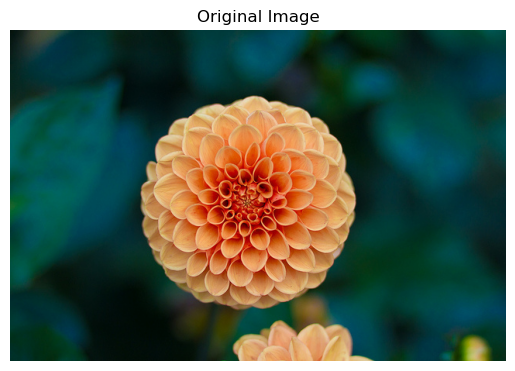

In [17]:
# Import necessary libraries: load_sample_images from sklearn.datasets and matplotlib.pyplot as plt.
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt

# Load a sample image using load_sample_images() and select the second image from the returned dictionary.
img = load_sample_images()["images"][1]
# Display the image using matplotlib's imshow function.
plt.imshow(img)
# Turn off axis display.
plt.axis("off")
# Add a title to the image.
plt.title("Original Image")
# Show the image.
plt.show()

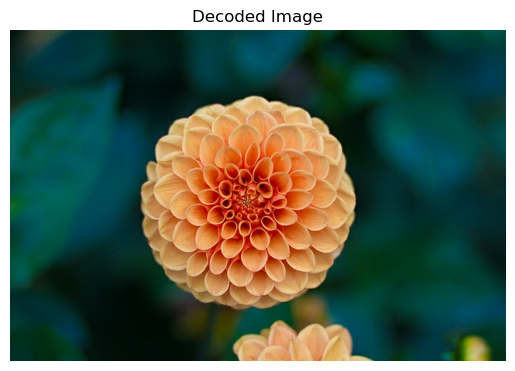

In [19]:
# Encode the image as a JPEG using TensorFlow's tf.io.encode_jpeg() function.
data = tf.io.encode_jpeg(img)

# Create an Example protobuf object with a feature named "image" containing the encoded image data.
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))
}))

# Serialize the Example protobuf object to a string representation.
serialized_example = example_with_image.SerializeToString()

# Define the feature description dictionary for parsing the TFRecord example.
# In this case, it contains a single entry for the "image" feature, which is a variable-length string feature.
feature_description = { "image": tf.io.VarLenFeature(tf.string) }

# Parse the serialized Example protobuf string using tf.io.parse_single_example(),
# providing the feature description dictionary to specify how to parse the features.
parsed_example = tf.io.parse_single_example(serialized_example, feature_description)

# Decode the JPEG image data stored in the parsed Example's "image" feature.
decoded_img = tf.io.decode_image(parsed_example["image"].values[0])

# Display the decoded image using matplotlib.
plt.imshow(decoded_img)

# Add a title to the displayed image.
plt.title("Decoded Image")

# Turn off axis display.
plt.axis("off")

# Show the image.
plt.show()


### Putting Tensors and Sparse Tensors in TFRecords

* You have the flexibility to store any tensor within a TFRecord's BytesList by first serializing the tensor using `tf.io.serialize_tensor()`. Once serialized, you place the resulting byte string into a BytesList feature. Later, when you're parsing the TFRecord, you can retrieve and parse this serialized data using `tf.io.parse_tensor()`.

* This process allows you to encode tensors into a format suitable for storage within TFRecords, and then easily decode them back into their original tensor form when needed.


In [20]:
import tensorflow as tf

# Define a tensor
t = tf.constant([[0., 1.], [2., 3.], [4., 5.]])

# Serialize the tensor
s = tf.io.serialize_tensor(t)

# Parse the serialized tensor
parsed_tensor = tf.io.parse_tensor(s, out_type=tf.float32)

# Output the parsed tensor
print(parsed_tensor)

tf.Tensor(
[[0. 1.]
 [2. 3.]
 [4. 5.]], shape=(3, 2), dtype=float32)


### Efficient Parsing of TFRecord Examples in Batches with TensorFlow

`tf.io.parse_example()` allows you to efficiently parse TFRecord examples in **batches**, which can be beneficial for performance when working with large datasets.

* This means rather than processing each example separately, you process multiple examples together, which can be more efficient especially when dealing with large datasets. By parsing examples in batches, you can take advantage of optimizations in TensorFlow for parallel processing, potentially speeding up the overall parsing process.



In [ ]:
import tensorflow as tf

# Assuming `feature_description` is defined earlier

# Create a TFRecord dataset, batching it with a batch size of 10
dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(10)

# Iterate through batches of serialized examples in the dataset
for serialized_examples in dataset:
    # Parse the serialized examples according to the feature description
    parsed_examples = tf.io.parse_example(serialized_examples, feature_description)